In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon

In [4]:
annotation_results=pd.read_csv('annotation_results.csv')

In [5]:
annotation_results.head()

,Tissue Name,Registered cells annotated,Unregistered cells annotated
0,GCA007ACB,5570,3669
1,GCA112TIA,445,516
2,GCA053ACB,7279,6534
3,GCA007TIB,23829,17453
4,GCA053TIA,3160,2454


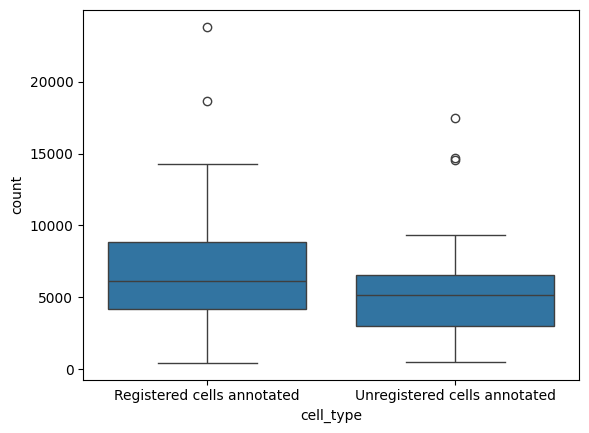

In [7]:
df_melted = annotation_results.melt(value_vars=['Registered cells annotated', 'Unregistered cells annotated'], var_name='cell_type', value_name='count')

# Create the boxplot
sns.boxplot(x='cell_type', y='count', data=df_melted)

# Display the plot
plt.show()

In [9]:
column1 = annotation_results['Registered cells annotated']
column2 = annotation_results['Unregistered cells annotated']

# Perform the Wilcoxon signed-rank test
w, p = wilcoxon(column1, column2)

print(f"W-statistic: {w}")
print(f"P-value: {p}")

W-statistic: 13.0
P-value: 3.2782554626464844e-07


/tmp/ipykernel_2105364/3233341256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cell_type', y='count', data=df_melted, palette='Set1')
/tmp/ipykernel_2105364/3233341256.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [annotation_results['Registered cells annotated'][i], annotation_results['Unregistered cells annotated'][i]], 'k-', color='grey', alpha=0.3)


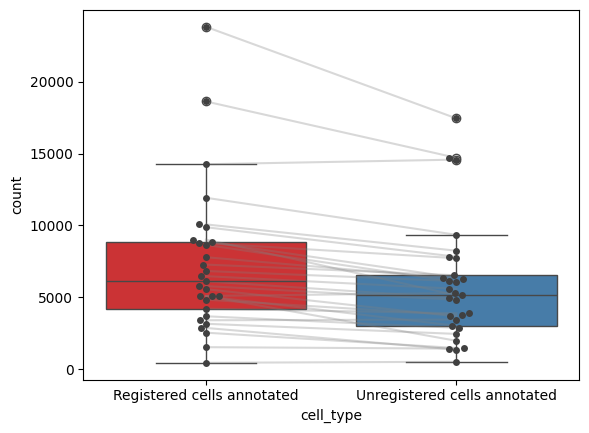

In [13]:
# Reshape the DataFrame
df_melted = annotation_results.melt(value_vars=['Registered cells annotated', 'Unregistered cells annotated'], var_name='cell_type', value_name='count')

# Create the boxplot with the Set1 palette
sns.boxplot(x='cell_type', y='count', data=df_melted, palette='Set1')

# Show the points in the box plot
sns.swarmplot(x='cell_type', y='count', data=df_melted, color=".25")

# Draw lines between corresponding points with transparency
for i in range(len(annotation_results)):
    plt.plot([0, 1], [annotation_results['Registered cells annotated'][i], annotation_results['Unregistered cells annotated'][i]], 'k-', color='grey', alpha=0.3)

# Display the plot
plt.show()

/tmp/ipykernel_2105364/4177573754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cell_type', y='count', data=df_melted, palette='Set1')
/tmp/ipykernel_2105364/4177573754.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [annotation_results['Registered cells annotated'][i], annotation_results['Unregistered cells annotated'][i]], 'k-', color='grey', alpha=0.3)


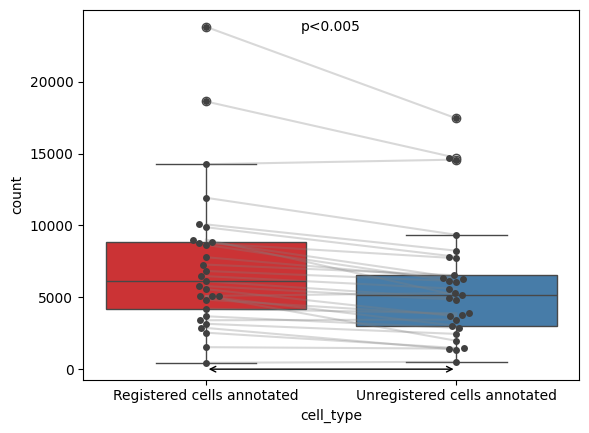

In [17]:
df_melted = annotation_results.melt(value_vars=['Unegistered cells annotated', 'Registered cells annotated'], var_name='cell_type', value_name='count')

# Create the boxplot with the Set1 palette
sns.boxplot(x='cell_type', y='count', data=df_melted, palette='Set1')

# Show the points in the box plot
sns.swarmplot(x='cell_type', y='count', data=df_melted, color=".25")

# Draw lines between corresponding points with transparency
for i in range(len(annotation_results)):
    plt.plot([0, 1], [annotation_results['Unegistered cells annotated'][i], annotation_results['Registered cells annotated'][i]], 'k-', color='grey', alpha=0.3)

# Draw a bracket and add text above it
plt.annotate('', xy=(0,1), xycoords='data', xytext=(1,1), textcoords='data', arrowprops={'arrowstyle':'<->'})

# Calculate the maximum values of the two columns and the position of the text
max_value = max(max(annotation_results['Unegistered cells annotated']), max(annotation_results['Registered cells annotated']))
text_position = max_value 

# Add text at the top of the box plots
plt.text(0.5, text_position, 'p<0.005', horizontalalignment='center', verticalalignment='center')

# Display the plot
plt.show()